<a href="https://colab.research.google.com/github/FurkNegz/MachineLearning/blob/main/GoldPredictRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#data collect
gold_data= pd.read_csv('/content/gld_price_data.csv')


In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [18]:

correlation=gold_data.corr()

<Axes: >

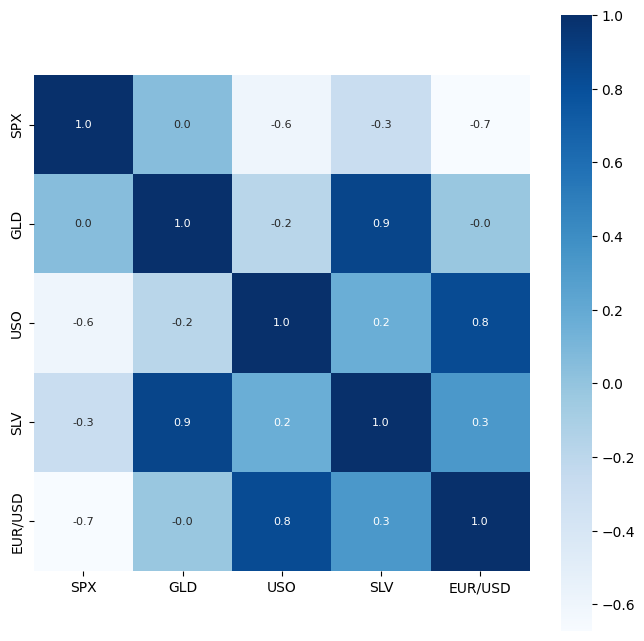

In [24]:
plt.figure(figsize= (8,8))
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [25]:
#correlation values of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

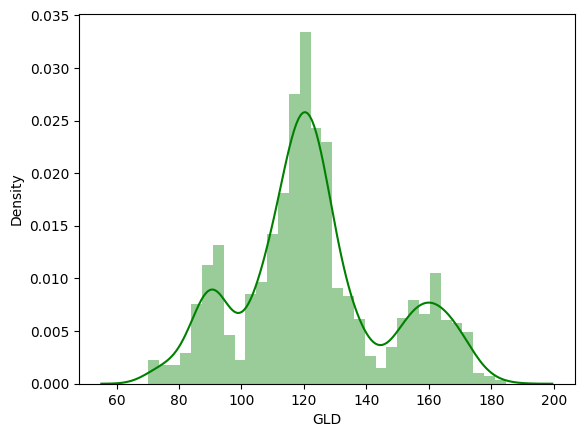

In [29]:
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [34]:
x=gold_data.drop(['GLD'],axis=1)
y=gold_data['GLD']

In [33]:
gold_data.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [35]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Splitting Training and TEst data

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Train model

In [41]:
randomforest=RandomForestRegressor(n_estimators=100)

In [42]:
#training the model
randomforest.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [43]:
#prediction on Test Data
test_data_prediction= randomforest.predict(x_test)

In [44]:
print(test_data_prediction)

[168.47229951  81.70869963 116.05050056 127.57020035 120.74970136
 154.72159771 150.10379865 126.23010024 117.56009874 125.77080106
 116.64830129 171.56230054 141.34459874 167.96159882 115.12320001
 117.41140057 138.79860259 169.93000096 159.93760325 157.68849965
 155.20880058 125.37050027 176.1393002  157.2973038  125.18620076
  93.74269971  77.15270021 120.79060028 119.11109923 167.41790047
  88.23070028 125.11219943  90.93290057 117.68340043 121.15639923
 136.15590031 115.41200095 114.89150067 148.86089915 107.06830118
 104.45660243  87.29929796 126.46630024 118.04410005 153.26509907
 119.7164001  108.50639977 108.26979812  93.26550035 127.02169782
  75.1521003  113.68579909 121.27960031 111.13429892 118.9050988
 120.28139936 159.88790049 168.34550065 147.04779674  85.81189822
  94.42570036  86.93329896  90.48349995 118.99840066 126.40230086
 127.62819987 169.42360078 122.20039923 117.35049884  98.44120025
 168.4139014  142.94079793 132.08600271 121.12970221 120.93429946
 119.678400

In [46]:
# R squared error
error_score= metrics.r2_score(test_data_prediction,y_test)
print(error_score)

0.9890995936731457


Text(0, 0.5, 'Prediction')

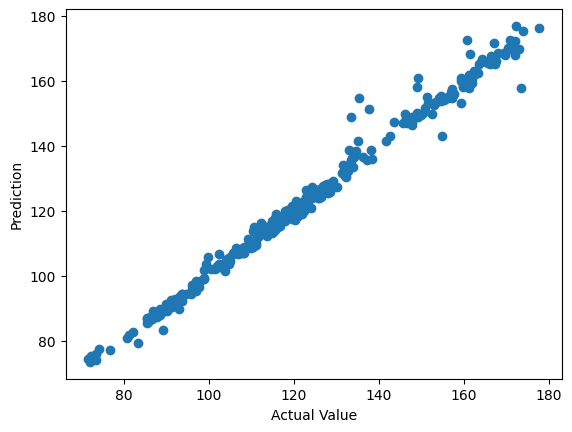

In [47]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Value')
plt.ylabel('Prediction')

In [49]:
y_test=list(y_test)

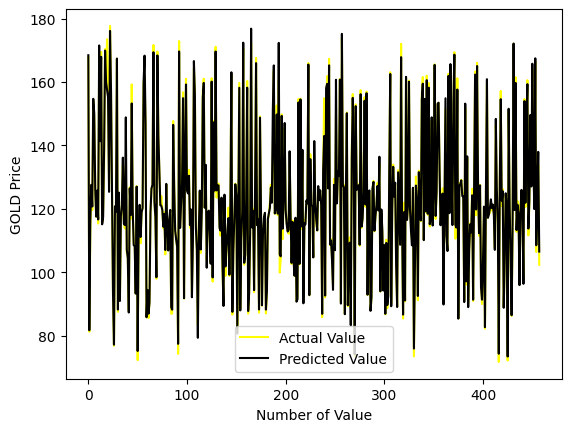

In [53]:
plt.plot(y_test,color='yellow',label='Actual Value')
plt.plot(test_data_prediction,color='black',label='Predicted Value')
plt.xlabel('Number of Value')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()